In [4]:
import os
os.environ['USE_PYGEOS'] = '0'
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
PATH_OLD = Path('Z:/nahaUsers/casadje/EFASv5')
PATH_NEW = Path('Z:/nahaUsers/casadje/EFASv6')

## Reservoirs

### EFAS5

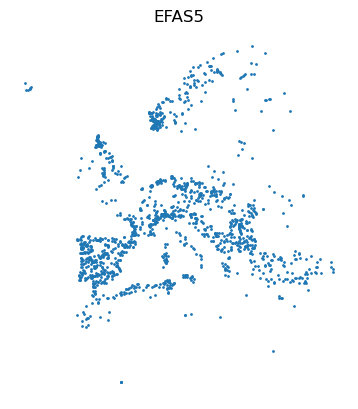

In [14]:
reservoirs_old = gpd.read_file(PATH_OLD / 'tables' / 'EFAS5_reservoirs.shp').set_index('ResID')
reservoirs_old.rename(columns={'stor': 'CAP_MCM'}, inplace=True)

reservoirs_old.plot(markersize=1)
plt.title('EFAS5')
plt.axis('off');

### EFAS6

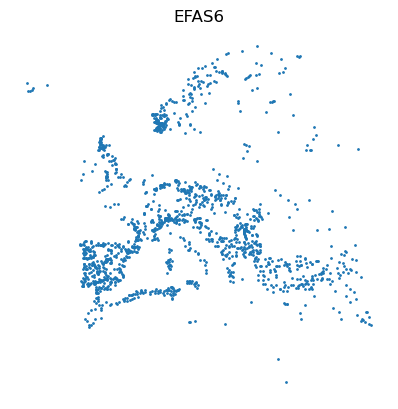

In [16]:
reservoirs_new = gpd.read_file(PATH_NEW / 'reservoirs' / 'tables' / 'efas6_reservoirs+GDW.shp').set_index('GDW_ID')

reservoirs_new.plot(markersize=1)
plt.title('EFAS6')
plt.axis('off');

### Comparison

In [43]:
reservoirs = {
    'EFASv5': reservoirs_old,
    'EFASv6': reservoirs_new
}

summary_res = pd.DataFrame(index=['count', 'storage'], columns=reservoirs.keys(), dtype=float)
for name, gdf in reservoirs.items():
    summary_res.loc['count', name] = len(gdf)
    summary_res.loc['storage', name] = gdf.CAP_MCM.sum() * 1e-3
    
summary_res

,EFASv5,EFASv6
count,1423.0000,1542.0000
storage,441.2162,953.8099


In [22]:
# total_storage = 10 # 10 km3

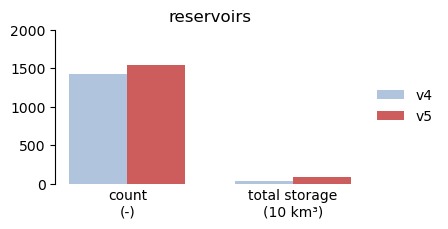

In [24]:
fig, ax = plt.subplots(figsize=(4, 2))
w = .7
x = np.array([1, 3])
ax.bar(x - w / 2, summary_res.EFASv5, width=w, color='lightsteelblue', label='v4')
ax.bar(x + w / 2, summary_res.EFASv6, width=w, color='indianred', label='v5')
ax.set_xticks(x)
ax.set_xticklabels(['count\n(-)', 'total storage\n(10 km³)'])
ax.tick_params(axis='x', length=0)
yticks = np.linspace(0, 2000, 5)
ax.set_yticks(yticks)
ax.spines[['bottom', 'right', 'top']].set_visible(False)
ax.set_title('reservoirs')
# for loc, col in zip([-1, 1], summary_res.columns):
#     pct_storage = summary_res[col].storage / total_storage * 100
#     ax.text(x[-1] + loc * w / 2, 200, f'{pct_storage:.0f}%', ha='center', va='center', c='w')
fig.legend(frameon=False, loc=5, bbox_to_anchor=[.9, .4, .2, .2]);

# plt.savefig('reservoirs_EFAS5_vs_EFAS6.jpg', dpi=300, bbox_inches='tight');

## Lakes
### EFAS5

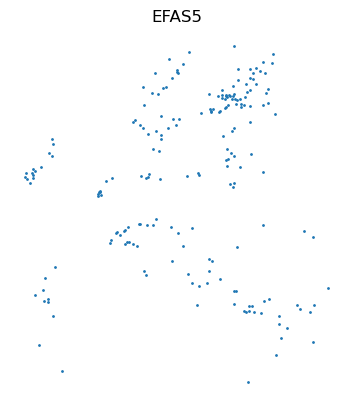

In [35]:
lakes_old = gpd.read_file(PATH_OLD / 'tables' / 'EFAS5_lakes.shp').set_index('LakID')
lakes_old.rename(columns={'AREA_KM2': 'AREA_SKM'}, inplace=True)

lakes_old.plot(markersize=1)
plt.title('EFAS5')
plt.axis('off');

### EFAS6

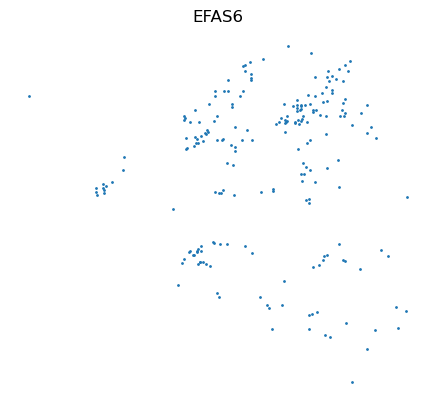

In [38]:
lakes_new = gpd.read_file(PATH_NEW / 'lakes' / 'tables' / 'efas6_lakes.shp')#.set_index('id')

lakes_new.plot(markersize=1)
plt.title('EFAS6')
plt.axis('off');

### Comparison

In [39]:
lakes = {
    'EFASv5': lakes_old,
    'EFASv6': lakes_new
}

summary_lak = pd.DataFrame(index=['count', 'area'], columns=lakes.keys(), dtype=float)
for name, gdf in lakes.items():
    summary_lak.loc['count', name] = len(gdf)
    summary_lak.loc['area', name] = gdf.AREA_SKM.sum() * 1e-3
    
summary_lak

,EFASv5,EFASv6
count,203.0000,214.0000
area,83.7308,71.8863


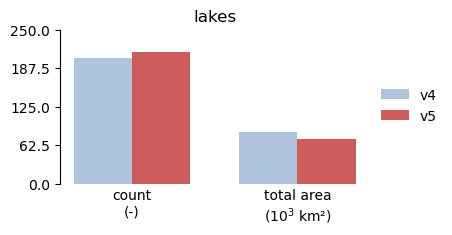

In [42]:
fig, ax = plt.subplots(figsize=(4, 2))
w = .7
x = np.array([1, 3])
ax.bar(x - w / 2, summary_lak.EFASv5, width=w, color='lightsteelblue', label='v4')
ax.bar(x + w / 2, summary_lak.EFASv6, width=w, color='indianred', label='v5')
ax.set_xticks(x)
ax.set_xticklabels(['count\n(-)', 'total area\n(10$^3$ km²)'])
ax.tick_params(axis='x', length=0)
yticks = np.linspace(0, 250, 5)
ax.set_yticks(yticks)
ax.spines[['bottom', 'right', 'top']].set_visible(False)
ax.set_title('lakes')
fig.legend(frameon=False, loc=5, bbox_to_anchor=[.9, .4, .2, .2]);

# plt.savefig('lakes_EFAS5_vs_EFAS6.jpg', dpi=300, bbox_inches='tight');